In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install rarfile

In [3]:
import os
from rarfile import RarFile

rar_path = '/content/drive/MyDrive/Datasets/ToysDataset.rar'

PATH = '/content/ToysDataset'

if not os.path.exists(PATH):
    os.makedirs(PATH)

with RarFile(rar_path, 'r') as rar_ref:
    rar_ref.extractall(PATH)

In [4]:
classes = os.listdir(PATH)
classes

['Peluches',
 'Yu-Gi-Oh',
 'Ajedrez',
 'Nerfs',
 'Rubik',
 'JuguetesMusicales',
 'LEGO',
 'FigurasAccion',
 'Dados',
 'Pelotas',
 'Cartas',
 'Vehiculos',
 'Barbies']

In [5]:
# Original
PATH = '/content/ToysDataset'
imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

Categoría: Peluches. Imágenes: 1003
Categoría: Yu-Gi-Oh. Imágenes: 1314
Categoría: Ajedrez. Imágenes: 1027
Categoría: Nerfs. Imágenes: 1000
Categoría: Rubik. Imágenes: 1000
Categoría: JuguetesMusicales. Imágenes: 1000
Categoría: LEGO. Imágenes: 1277
Categoría: FigurasAccion. Imágenes: 1000
Categoría: Dados. Imágenes: 1017
Categoría: Pelotas. Imágenes: 1045
Categoría: Cartas. Imágenes: 1272
Categoría: Vehiculos. Imágenes: 1388
Categoría: Barbies. Imágenes: 1211


In [6]:
pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.2 MB/s eta 0:00:00


In [7]:
import os
from py7zr import SevenZipFile

seven_zip_path = '/content/drive/MyDrive/Datasets/ToysDatasetDataAumentation2.7z'

PATH2 = '/content/ToysDataset7000'

if not os.path.exists(PATH2):
    os.makedirs(PATH2)

with SevenZipFile(seven_zip_path, mode='r') as z:
    z.extractall(PATH2)

In [8]:
# Original
PATH2 = '/content/ToysDataset7000/ToysDatasetDataAumentation2'
imgs2, labels2 = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH2}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs2 += [f'{PATH2}/{lab}/{img}' for img in paths]
  labels2 += [i]*len(paths)

Categoría: Peluches. Imágenes: 7000
Categoría: Yu-Gi-Oh. Imágenes: 7000
Categoría: Ajedrez. Imágenes: 7000
Categoría: Nerfs. Imágenes: 7000
Categoría: Rubik. Imágenes: 7000
Categoría: JuguetesMusicales. Imágenes: 7000
Categoría: LEGO. Imágenes: 7000
Categoría: FigurasAccion. Imágenes: 7000
Categoría: Dados. Imágenes: 7000
Categoría: Pelotas. Imágenes: 7000
Categoría: Cartas. Imágenes: 7000
Categoría: Vehiculos. Imágenes: 7000
Categoría: Barbies. Imágenes: 7000


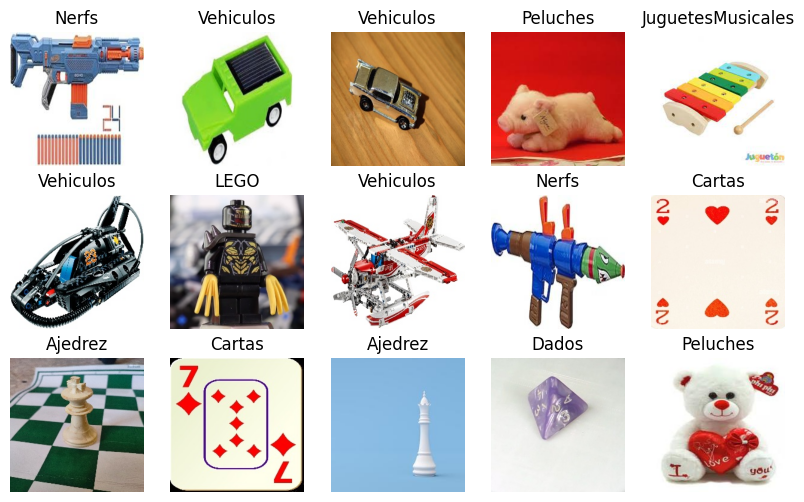

In [13]:
import random
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

In [14]:
# Originales
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(8782, 2196)

In [15]:
# Usar todos los datos como conjunto de entrenamiento
train_imgs2 = imgs2
train_labels2 = labels2

# Verificar la longitud del conjunto de entrenamiento
len(train_imgs2)

91000

In [ ]:
# # Data Augmentation
# from sklearn.model_selection import train_test_split

# train_imgs2, test_imgs2, train_labels2, test_labels2 = train_test_split(imgs2, labels2, test_size=0.2, stratify=labels2)

# len(train_imgs2), len(test_imgs2)

In [16]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

In [17]:
import albumentations as A

trans = A.Compose([
    A.Resize(128, 128)
])

dataset = {
    'train': Dataset(train_imgs2, train_labels2, trans, device),
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(91000, 2196)

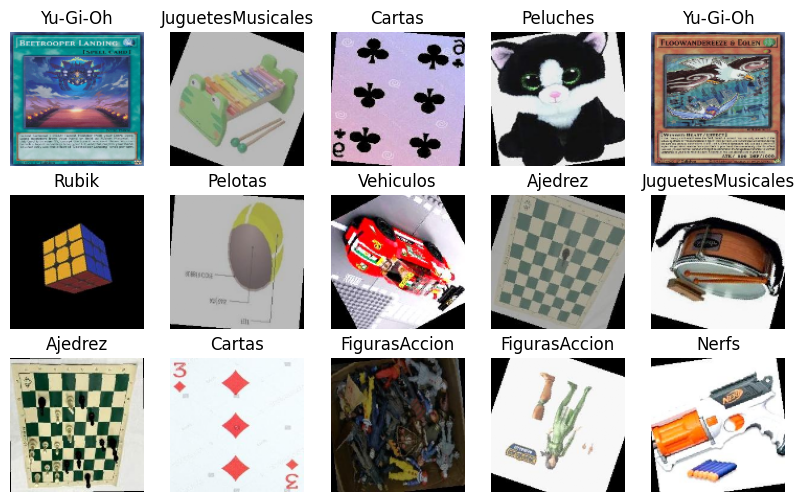

In [18]:
fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [19]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 128, 128])

# Modelo

In [20]:
import torchvision

vgg = torchvision.models.vgg16()
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [22]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [26]:
class Model(torch.nn.Module):
    def __init__(self, n_outputs=13, pretrained=False, freeze=False):
        super().__init__()
        # Descargar el modelo VGG19 preentrenado
        vgg = torchvision.models.vgg16(pretrained=pretrained)

        # Quedarse con todas las capas de características
        self.features = torch.nn.Sequential(*list(vgg.features.children()))

        # Quedarse con todas las capas del bloque clasificador excepto la última
        # self.classifier = torch.nn.Sequential(*list(vgg.classifier.children())[:-1])

        # Añadir tu propia capa fully connected con 13 salidas
        self.fc = torch.nn.Linear(8192, n_outputs)

        if freeze:
            for param in self.features.parameters():
                param.requires_grad = False

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        # x = self.classifier(x)
        x = self.fc(x)
        return x

    def unfreeze(self):
        for param in self.features.parameters():
            param.requires_grad = True


In [ ]:
# model = Model()
# # Para verificar la salida
# outputs = model(torch.randn(64, 3, 224, 224))
# outputs.shape

In [27]:
model = Model()
fit(model, dataloader, epochs=7)

val_loss 1.15360 val_acc 0.63110: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


Epoch 1/7 loss 1.89656 val_loss 1.15360 acc 0.37848 val_acc 0.63110


val_loss 0.81338 val_acc 0.73229: 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]


Epoch 2/7 loss 1.08377 val_loss 0.81338 acc 0.65918 val_acc 0.73229


val_loss 0.41450 val_acc 0.86133: 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]


Epoch 3/7 loss 0.75610 val_loss 0.41450 acc 0.75826 val_acc 0.86133


val_loss 0.28453 val_acc 0.91113: 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]


Epoch 4/7 loss 0.54088 val_loss 0.28453 acc 0.82758 val_acc 0.91113


val_loss 0.27748 val_acc 0.90797: 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]


Epoch 5/7 loss 0.37814 val_loss 0.27748 acc 0.87748 val_acc 0.90797


val_loss 0.11722 val_acc 0.96444: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


Epoch 6/7 loss 0.26126 val_loss 0.11722 acc 0.91485 val_acc 0.96444


val_loss 0.08951 val_acc 0.97017: 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

Epoch 7/7 loss 0.17861 val_loss 0.08951 acc 0.94078 val_acc 0.97017



Transfer Learning

In [ ]:
model = Model(pretrained=True, freeze=True)
fit(model, dataloader, epochs=7)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 106MB/s]
val_loss 0.22682 val_acc 0.92954: 100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


Epoch 1/7 loss 0.53817 val_loss 0.22682 acc 0.85616 val_acc 0.92954


val_loss 0.17006 val_acc 0.94770: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Epoch 2/7 loss 0.22333 val_loss 0.17006 acc 0.93219 val_acc 0.94770


val_loss 0.15222 val_acc 0.95294: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Epoch 3/7 loss 0.16028 val_loss 0.15222 acc 0.95002 val_acc 0.95294


val_loss 0.14027 val_acc 0.95879: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Epoch 4/7 loss 0.12735 val_loss 0.14027 acc 0.96126 val_acc 0.95879


val_loss 0.13939 val_acc 0.95528: 100%|██████████| 10/10 [00:17<00:00,  1.80s/it]


Epoch 5/7 loss 0.10507 val_loss 0.13939 acc 0.96671 val_acc 0.95528


val_loss 0.12848 val_acc 0.95951: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Epoch 6/7 loss 0.08164 val_loss 0.12848 acc 0.97703 val_acc 0.95951


val_loss 0.13393 val_acc 0.95990: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]

Epoch 7/7 loss 0.06665 val_loss 0.13393 acc 0.98093 val_acc 0.95990


Fine Tuning

In [ ]:
# model = Model(pretrained=True, freeze=False)
# fit(model, dataloader, epochs=7)

In [ ]:
model_o = Model(pretrained=True, freeze=True)
fit(model_o, dataloader, epochs=7)
model_o.unfreeze()
print("-----------------------------------------------")
fit(model_o, dataloader, epochs=7, lr=1e-4)

val_loss 0.26019 val_acc 0.91336: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


Epoch 1/7 loss 0.53334 val_loss 0.26019 acc 0.86007 val_acc 0.91336


val_loss 0.19129 val_acc 0.93549: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Epoch 2/7 loss 0.21886 val_loss 0.19129 acc 0.93276 val_acc 0.93549


val_loss 0.14976 val_acc 0.95560: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


Epoch 3/7 loss 0.15762 val_loss 0.14976 acc 0.95005 val_acc 0.95560


val_loss 0.14068 val_acc 0.95739: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Epoch 4/7 loss 0.12595 val_loss 0.14068 acc 0.96274 val_acc 0.95739


val_loss 0.13183 val_acc 0.96029: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Epoch 5/7 loss 0.10297 val_loss 0.13183 acc 0.97025 val_acc 0.96029


val_loss 0.13067 val_acc 0.96162: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Epoch 6/7 loss 0.08269 val_loss 0.13067 acc 0.97536 val_acc 0.96162


val_loss 0.12681 val_acc 0.95889: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Epoch 7/7 loss 0.06732 val_loss 0.12681 acc 0.98133 val_acc 0.95889
-----------------------------------------------


val_loss 0.11821 val_acc 0.96201: 100%|██████████| 10/10 [00:18<00:00,  1.80s/it]


Epoch 1/7 loss 0.05686 val_loss 0.11821 acc 0.98233 val_acc 0.96201


val_loss 0.11532 val_acc 0.96201: 100%|██████████| 10/10 [00:18<00:00,  1.80s/it]


Epoch 2/7 loss 0.05097 val_loss 0.11532 acc 0.98618 val_acc 0.96201


val_loss 0.11326 val_acc 0.96280: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Epoch 3/7 loss 0.04657 val_loss 0.11326 acc 0.98648 val_acc 0.96280


val_loss 0.11152 val_acc 0.96302: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Epoch 4/7 loss 0.04721 val_loss 0.11152 acc 0.98628 val_acc 0.96302


val_loss 0.11006 val_acc 0.96302: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Epoch 5/7 loss 0.04832 val_loss 0.11006 acc 0.98548 val_acc 0.96302


val_loss 0.10995 val_acc 0.96397: 100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


Epoch 6/7 loss 0.04330 val_loss 0.10995 acc 0.98848 val_acc 0.96397


val_loss 0.10934 val_acc 0.96397: 100%|██████████| 10/10 [00:17<00:00,  1.80s/it]

Epoch 7/7 loss 0.04669 val_loss 0.10934 acc 0.98590 val_acc 0.96397


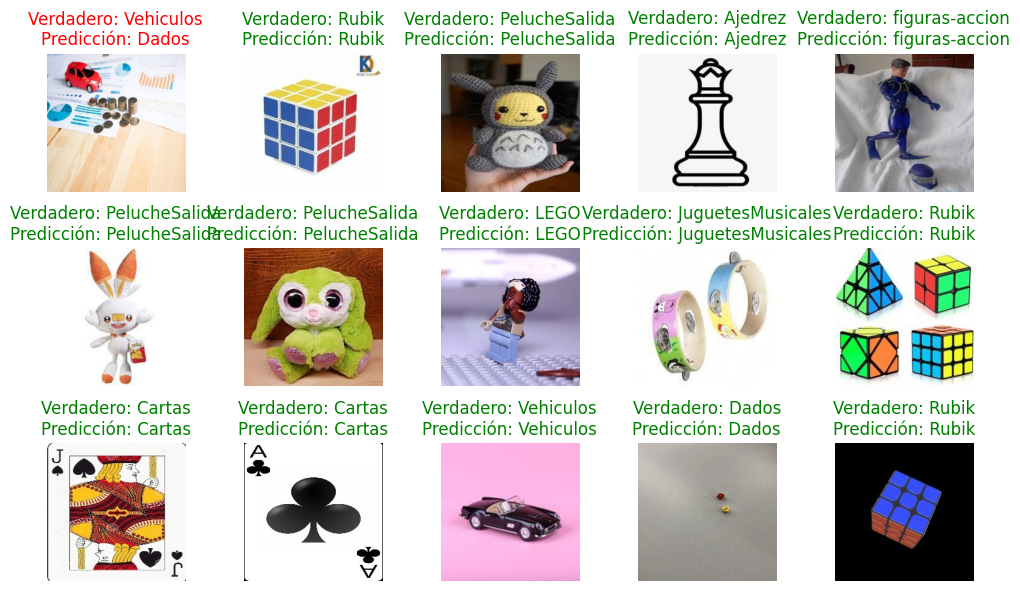

In [ ]:
import random
import matplotlib.pyplot as plt

def evaluate_image(model, image):
    model.eval()
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        prediction = torch.argmax(output, dim=1).item()
    return prediction

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))

for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['test']) - 1)      # índice aleatorio
        img, true_label = dataset['test'][ix]                 # Obtener la imagen y la etiqueta verdadera
        prediction = evaluate_image(model_o, img.to(device))  # Realizar la predicción
        plt.imshow(img.permute(1, 2, 0).cpu().numpy())
        plt.axis("off")
        title_color = "green" if prediction == true_label else "red"
        plt.title(f"Verdadero: {classes[true_label]}\nPredicción: {classes[prediction]}", color=title_color)

plt.tight_layout()
plt.show()